# Project: Image classification for Arabic handwritten character
## Abstract
### An attempt is made to recognize handwritten characters for Arabic characters. The train dataset consist of 13440 images of characters and 28 classes .The feature extraction technique is obtained by normalizing the pixel values. Pixel values will range from 0 to 255 which represents the intensity of each pixel in the image and they are normalized to represent values between 0 - 1. Convolutional neural network is used as a classifier.

## Introduction

### This data set contains data that mimics Arabic letters. In this project, I will understand the data and try to provide a solution for how to read Arabic handwritten character.
### I published an article in medium here https://medium.com/@hass.9964/image-classification-for-arabic-handwritten-character-64209a7aba9d

#  0. Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 1024)
import matplotlib.pyplot as plt
import random

import warnings
warnings.filterwarnings("ignore")

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Flatten ,GlobalAveragePooling2D, BatchNormalization, Dropout, Dense
from keras.optimizers import RMSprop
from keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
%matplotlib inline

Using TensorFlow backend.


# 1. Load the dataset (train and test).

In [2]:
# Load the training data
x_train = pd.read_csv('Arabic Handwritten Characters Recognition/csvTrainImages 13440x1024.csv', header = None)
# Load training labels
x_label = pd.read_csv('Arabic Handwritten Characters Recognition/csvTrainLabel 13440x1.csv', names=['count'])
# Load test data
y_test = pd.read_csv('Arabic Handwritten Characters Recognition/csvTestImages 3360x1024.csv', header = None)
# Load test labels
y_label = pd.read_csv('Arabic Handwritten Characters Recognition/csvTestLabel 3360x1.csv', header = None)

# 2. Print the first five rows of the training

In [3]:
x_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

# 3. Check for erroneous values

## 3.1. Check for missing values
### The result bellow shows that there are no missing values

In [4]:
null_columns=x_train.columns[x_train.isnull().any()]
x_train[null_columns].isnull().sum()

Series([], dtype: float64)

## 3.2. Check maximum value

## Since we are workin with pixel values, the maximum value should not exceed 255.

In [5]:
x_train.values.max()

255

## 3.3. Check for negative values


In [6]:
(x_train.values < 0).any(), (y_test.values < 0).any()

(False, False)

### Since we are working with pixel values, there should be no negative values. The result shows there are no negative values.

# 4. Print the full summary of the training dataset (before splitting into train-validate)

In [7]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13440 entries, 0 to 13439
Columns: 1024 entries, 0 to 1023
dtypes: int64(1024)
memory usage: 105.0 MB


### The summary above shows that the data has only integer values

# 5. Plot the ditribution of lables

Text(0, 0.5, 'Letters')

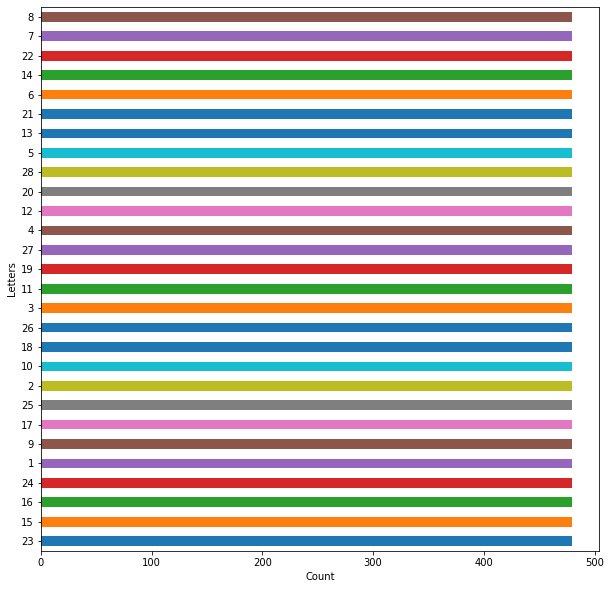

In [8]:
x_label['count'].value_counts().plot(kind='barh', figsize=(10,10))
plt.xlabel('Count')
plt.ylabel('Letters')

### From plotting the data, it appears that we have the same occurrence for each letter

# 6. split the training data into training and validation
### Validation data are used to provide an unbiased evaluation of a model fit on the training dataset while tuning model hyperparameters.

In [9]:
x_train, z_val, x_label, z_label = train_test_split(x_train, x_label, test_size=0.20, random_state=42)

# 7. Print number of rows and columns

In [10]:
print(x_train.shape, x_label.shape, y_test.shape, y_label.shape, z_val.shape, z_label.shape)

(10752, 1024) (10752, 1) (3360, 1024) (3360, 1) (2688, 1024) (2688, 1)


### Training dataset comprises of 10752 observations and 1024 characteristics and 1 dependent variable.
### Testing dataset comprises of 3360 observations and 1024 characteristics and 1 dependent variable.
### Validation dataset comprises of 2688 observations and 1024 characteristics and 1 dependent variable.

# 8. Now we need to take  the values from the data and convert them into float so we can normalize it between 0–1 without loss of information.

In [11]:
x_train = x_train.values.astype('float32')
x_label = x_label.values.astype('int32')-1 #Arabic letters are 28(index starts from 0-27)
y_test = y_test.values.astype('float32')
y_label = y_label.values.astype('int32')-1
z_val = z_val.values.astype('float32')
z_label = z_label.values.astype('int32')-1

# 9. We need to reshape the data from [# images, # features(32X32)] into [#images, # pixels, # pixels], to ensure that the input data to the model is in the correct shape.

In [112]:
# sqrt(1024) = 32
x_train = x_train.reshape(-1, 32, 32)
y_test = y_test.reshape(-1, 32, 32)
z_val = z_val.reshape(-1, 32, 32)
x_train.shape, y_test.shape, z_val.shape

((10752, 32, 32), (3360, 32, 32), (2688, 32, 32))

# 10. Create a list of Arabic letters to randomly visualize it later

In [113]:
ArabicLetters = ['أ', 'ب', 'ت', 'ث', 'ج', 'ح', 'خ', 'د', 
           'ذ', 'ر', 'ز', 'س', 'ش', 'ص', 'ض', 
            'ط', 'ظ', 'ع', 'غ', 'ف', 'ق', 'ك', 'ل', 
            'م', 'ن', 'ه', 'و', 'ي']

# 11. Plotting random images of training set along with their label

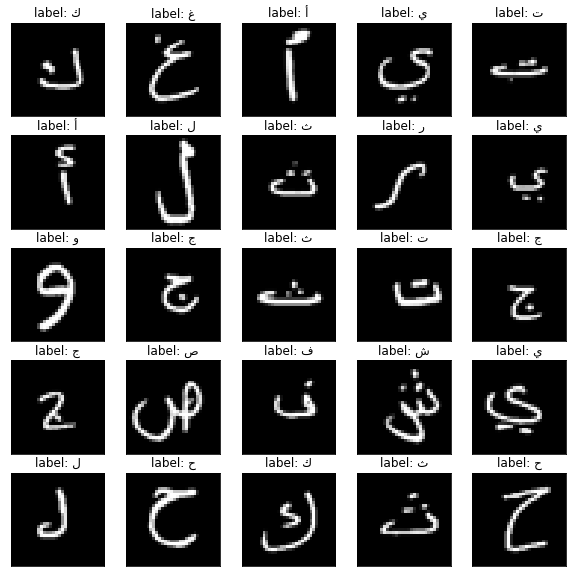

In [117]:
fig = plt.figure(0, figsize=(10,10))
indices = np.random.randint(0, x_train.shape[0], size=25)

for i, idx in enumerate(indices):
    plt.subplot(5,5,i+1)
    img_disp = x_train[idx]
    img_disp = np.rot90(np.flipud(img_disp), k=3) #rotate clockwise (by going counter-clockwise 3 times)
    plt.imshow(img_disp, cmap='gray')
    plt.title("label: {}".format(ArabicLetters[int(x_label[idx])]))
    plt.xticks([])
    plt.yticks([])
plt.show()

# 12. Our Datasets have value in each pixel between 0–255 so now we have to scale it between 0–1. To normalize the pixel values, divide by 255 (maximum pixel value).

In [118]:
x_train = x_train / 255
y_test = y_test / 255
z_val = z_val / 255

# 13. Convolution2D layers are designed to work with 4 dimensions. Therefore change the dimension of each image to (batch, rows, columns, channels). The channels signify whether the image is grayscale or colored . In this case, it is grayscale images so 1 is given for channels.

In [119]:
x_train = x_train.reshape(-1, 32, 32,1)
y_test = y_test.reshape(-1, 32, 32,1)
z_val = z_val.reshape(-1, 32, 32,1)
(x_train.shape[1:], y_test.shape[1:], z_val.shape[1:])

((32, 32, 1), (32, 32, 1), (32, 32, 1))

# 14. Create a method to Visualize augmented images.

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

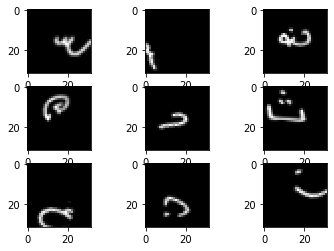

In [135]:
datagen = ImageDataGenerator(width_shift_range=.2, 
                             height_shift_range=.2,
                             fill_mode='nearest', rotation_range=90,horizontal_flip=True)

# fit parameters from data
datagen.fit(x_train)

# Configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(x_train, x_label, batch_size=9):
    # Show 9 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(img_rows, img_cols),cmap='gray')
    # show the plot
    pyplot.show()
    break

# 15. Using One Hot Encoding to transform the number of classes (28) from integer to binary, where one of them will be selected at a time (given a value of 1 and the rest are 0s.

In [136]:
x_label = to_categorical(x_label, num_classes=28)
y_label = to_categorical(y_label, num_classes=28)
z_label = to_categorical(z_label, num_classes=28)

# 16. Finding The Best Model

## 16.1. Lets start with finding the best value for dropout. Dropout will prevent our network from overfitting, so it helps our network to generalize better.

In [19]:
# CNN to find the best dropout
nets = 4
model = [0] *nets
input_shape = (32, 32, 1)
history = [0] * nets

for j in range(nets):
    
    model[j] = Sequential()
    model[j].add(Conv2D(16, (3,3), padding='same', input_shape=input_shape, 
                         kernel_initializer='uniform', activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(MaxPooling2D(pool_size=2))
    model[j].add(Dropout(rate=j*0.1))

    model[j].add(Conv2D(32, (3,3), padding='same', input_shape=input_shape, 
                         kernel_initializer='uniform', activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(MaxPooling2D(pool_size=2))
    model[j].add(Dropout(rate=j*0.1))
    
    model[j].add(Conv2D(64, (3,3), padding='same', input_shape=input_shape, 
                         kernel_initializer='uniform', activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(MaxPooling2D(pool_size=2))
    model[j].add(Dropout(rate=j*0.1))

    model[j].add(Conv2D(64, (3,3), padding='same', input_shape=input_shape, 
                         kernel_initializer='uniform', activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(MaxPooling2D(pool_size=2))
    model[j].add(Dropout(rate=j*0.1))
    
    model[j].add(Flatten())
    model[j].add(Dense(128, activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Dropout(rate=j*0.1))

    model[j].add(Dense(28, activation='softmax'))
    model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


## 16.1.2. Fit the model

In [20]:
names = ["0%","10%","20%","30%"]
for j in range(nets):
    history[j] = model[j].fit(x_train,x_label, batch_size=32, epochs = 5, 
        validation_data = (z_val,z_label), verbose=0)
    print("Dropout {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        names[j],5,max(history[j].history['acc']),max(history[j].history['val_acc']) ))

Dropout 0%: Epochs=5, Train accuracy=0.96494, Validation accuracy=0.84673
Dropout 10%: Epochs=5, Train accuracy=0.91778, Validation accuracy=0.91890
Dropout 20%: Epochs=5, Train accuracy=0.83064, Validation accuracy=0.86905
Dropout 30%: Epochs=5, Train accuracy=0.75065, Validation accuracy=0.88058


## 16.1.3. Model visualization

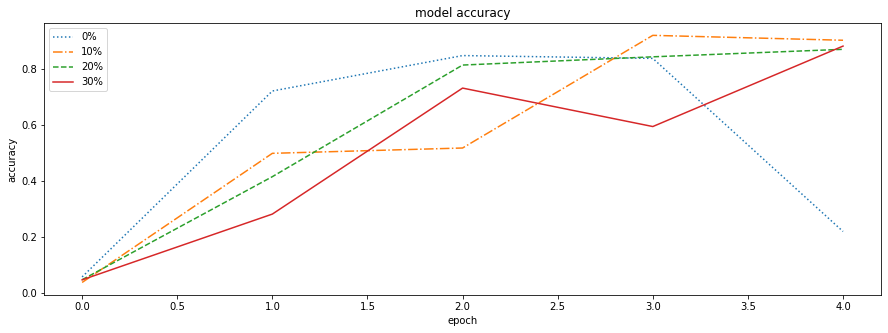

In [21]:
styles=[':','-.','--','-',':','-.','--','-',':','-.','--','-']
plt.figure(figsize=(15,5))
for i in range(nets):
    plt.plot(history[i].history['val_acc'],linestyle=styles[i])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
plt.show()

### Based on the results above, the best dropouts are 10% and 30%. However  I decided to choose 30% Dropout for the model.

# Finding the best values for CNN filters.¶

In [22]:
# CNN to find the best filter mapping
nets = 4
model = [0] *nets
input_shape = (32, 32, 1)
history = [0] * nets

model = [0] *nets


for j in range(nets):
    
    model[j] = Sequential()
    model[j].add(Conv2D((j*16)+16, (3,3), padding='same', input_shape=input_shape, 
                         kernel_initializer='uniform', activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(MaxPooling2D(pool_size=2))
    model[j].add(Dropout(rate=0.3))

    model[j].add(Conv2D((j*32)+32, (3,3), padding='same', input_shape=input_shape, 
                         kernel_initializer='uniform', activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(MaxPooling2D(pool_size=2))
    model[j].add(Dropout(rate=0.3))
    
    model[j].add(Flatten())
    model[j].add(Dense(128, activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Dropout(rate=0.3))

    model[j].add(Dense(28, activation='softmax'))
    model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [23]:
names = ["16","32","48","64"]
for j in range(nets):
    history[j] = model[j].fit(x_train,x_label, batch_size=32, epochs = 5, 
        validation_data = (z_val,z_label), verbose=0)
    print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        names[j],5,max(history[j].history['acc']),max(history[j].history['val_acc']) ))

CNN 16: Epochs=5, Train accuracy=0.81110, Validation accuracy=0.82403
CNN 32: Epochs=5, Train accuracy=0.87333, Validation accuracy=0.88504
CNN 48: Epochs=5, Train accuracy=0.89435, Validation accuracy=0.89769
CNN 64: Epochs=5, Train accuracy=0.91053, Validation accuracy=0.89583


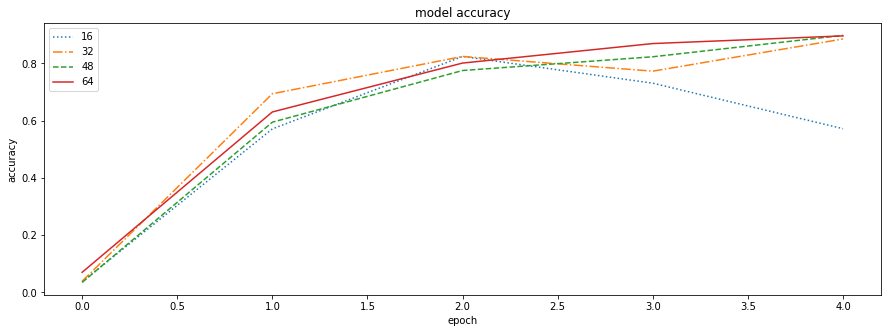

In [25]:
styles=[':','-.','--','-',':','-.','--','-',':','-.','--','-']
plt.figure(figsize=(15,5))
for i in range(nets):
    plt.plot(history[i].history['val_acc'],linestyle=styles[i])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
plt.show()

## feature mapping for CNN
### 16 - 32
### 32 - 64
### 48 - 96
### 64 - 160
### From the results above, it seems that 32-64, 48-96 and 64-160 are the best values for filters mapping. To reduce the computation cost I will choose 32-64.

# 16.2. Creating a method for experimenting different parameters

In [26]:
def create_model(optimizer='Adam', kernel_initializer='uniform', activation='relu'):

    model = Sequential()

    model.add(Conv2D(16, (3,3), padding='same', input_shape=input_shape, 
                     kernel_initializer=kernel_initializer, activation=activation))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(rate=0.3))

    model.add(Conv2D(32, (3,3), padding='same', 
               kernel_initializer=kernel_initializer, activation=activation))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(rate=0.3))

    model.add(Conv2D(64, (3,3), padding='same', 
               kernel_initializer=kernel_initializer, activation=activation))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(rate=0.3))

    model.add(Conv2D(128, (3,3), padding='same', 
               kernel_initializer=kernel_initializer, activation=activation))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(rate=0.3))

    model.add(Conv2D(256, (3,3), padding='same', 
               kernel_initializer=kernel_initializer, activation=activation))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(rate=0.3))


    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(rate=0.3))

    # fully connected Final layer
    model.add(Dense(28, activation='softmax'))

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# 16.2.1. Trying a different paramenters (Optimizers, Kernel_initializers amd activation functions) to find the best parameter values.

In [27]:
optimizer = ['RMSprop', 'Adam']
kernel_initializer = ['normal', 'uniform']
activation = ['relu', 'linear']

for a,b,c in [(x,y,z) for x in optimizer for z in activation for y in kernel_initializer]:
    params = {'optimizer' : a , 'kernel_initializer' : b , 'activation' : c}
    print(params)
    curr_model = create_model(a, b, c)
    curr_model.fit(x_train, x_label, 
                    validation_data=((z_val,z_label)),
                    epochs=5, batch_size=32, shuffle=True, verbose=1)
    print("------------------------------------------------------------------------------------")

{'optimizer': 'RMSprop', 'kernel_initializer': 'normal', 'activation': 'relu'}
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 10752 samples, validate on 2688 samples
Epoch 1/5
10752/10752 [==============================] - 79s 7ms/sample - loss: 2.9504 - acc: 0.1734 - val_loss: 6.5541 - val_acc: 0.0394
Epoch 2/5
10752/10752 [==============================] - 80s 7ms/sample - loss: 1.6397 - acc: 0.4454 - val_loss: 4.0635 - val_acc: 0.1153
Epoch 3/5
10752/10752 [==============================] - 77s 7ms/sample - loss: 1.1256 - acc: 0.6169 - val_loss: 1.2833 - val_acc: 0.5454
Epoch 4/5
10752/10752 [==============================] - 71s 7ms/sample - loss: 0.8754 - acc: 0.7001 - val_loss: 1.0232 - val_acc: 0.6295
Epoch 5/5
10752/10752 [==============================] - 69s 6ms/sample - loss: 0.7423 - acc: 0.7482 - val_loss: 0.3459 - val_acc: 0.8836
----------------------------------------------------------------

### From the results above, it seem that the best parameters are:
## 1- {'optimizer': 'RMSprop', 'kernel_initializer': 'normal', 'activation': 'relu'}
## 2- {'optimizer': 'Adam', 'kernel_initializer': 'uniform', 'activation': 'relu'}
## After running the model multiple times I decided to go with {'optimizer': 'Adam', 'kernel_initializer': 'uniform', 'activation': 'relu'}.

# 17. Building The Final Model With The Best Parameters

In [137]:
input_shape = (32, 32, 1)

model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', input_shape=input_shape, 
                     kernel_initializer='uniform', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(rate=0.3))

model.add(Conv2D(32, (3,3), padding='same', input_shape=input_shape, 
                     kernel_initializer='uniform', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(rate=0.3))

model.add(Conv2D(64, (3,3), padding='same', input_shape=input_shape, 
                     kernel_initializer='uniform', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(rate=0.3))

model.add(Conv2D(64, (3,3), padding='same', input_shape=input_shape, 
                     kernel_initializer='uniform', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(rate=0.3))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.3))

model.add(Dense(28, activation='softmax'))
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        9248      
__________________

## 17.1 About the model
### 1. The first layer is the input which is the first convolutional hidden layer , the layer has N feature(Filters) which is  (the number of output filters in the convolution),  with window size of 3×3 and an activation function (relu).
### 2. The second layer is batch normalization which solves having distributions of the features vary across the training and test data. It is used to help in faster learning and higher overall accuracy.
### 3.  Third layer is the MaxPooling layer, which is used to down-sample the input input representation,reducing its dimensionality and allowing for assumptions to be made about features contained in the sub-regions binned. It helps reducing overfitting and computational cost by reducing the number of parameters to learn.
### 4. The next layer is Dropout. It is set to exclude 30% of the neurons. 
### 5. Steps 1 - 4 are repeated 4 times
### 6. After that a Flatten layer is used to transform the output (tensor) from the previous layer into a one dimensional tensor. It allows the output to be processed by standard fully connected layers.
### 7. Prior to the last layer there is a dense layer. With each input node is connected to each output node with BatchNormalization and Dropout layers.
### 8. Last layer is a dense, which is a fully connected final layer with 28 neurons (number of output classes) and it as multi-classes so it uses softmax activation function.

In [38]:
history = model.fit(x_train, x_label, validation_data=(z_val,z_label),epochs=10, batch_size=32, shuffle=True, verbose=1)

Train on 10752 samples, validate on 2688 samples
Epoch 1/10
10752/10752 [==============================] - 28s 3ms/sample - loss: 2.7133 - acc: 0.2241 - val_loss: 8.0047 - val_acc: 0.0368
Epoch 2/10
10752/10752 [==============================] - 24s 2ms/sample - loss: 1.4301 - acc: 0.5255 - val_loss: 2.2004 - val_acc: 0.2984
Epoch 3/10
10752/10752 [==============================] - 24s 2ms/sample - loss: 0.9745 - acc: 0.6728 - val_loss: 0.7540 - val_acc: 0.7374
Epoch 4/10
10752/10752 [==============================] - 24s 2ms/sample - loss: 0.7787 - acc: 0.7364 - val_loss: 0.5618 - val_acc: 0.8051
Epoch 5/10
10752/10752 [==============================] - 25s 2ms/sample - loss: 0.6421 - acc: 0.7821 - val_loss: 0.8893 - val_acc: 0.6827
Epoch 6/10
10752/10752 [==============================] - 25s 2ms/sample - loss: 0.5656 - acc: 0.8093 - val_loss: 2.1504 - val_acc: 0.4427
Epoch 7/10
10752/10752 [==============================] - 25s 2ms/sample - loss: 0.5098 - acc: 0.8305 - val_loss: 0.4

## 17.2. Accuracy VS Epoch Visualization

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


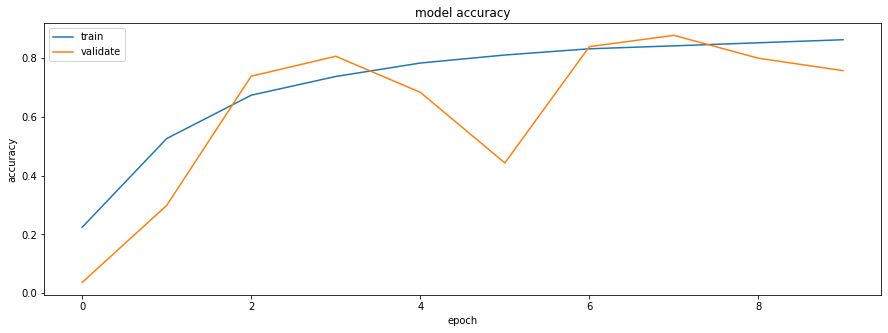

In [39]:
# summarize history for acuuracy
print(history.history.keys())
plt.figure(figsize=(15,5))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()

## 17.3. Loss VS Epoch Visualization

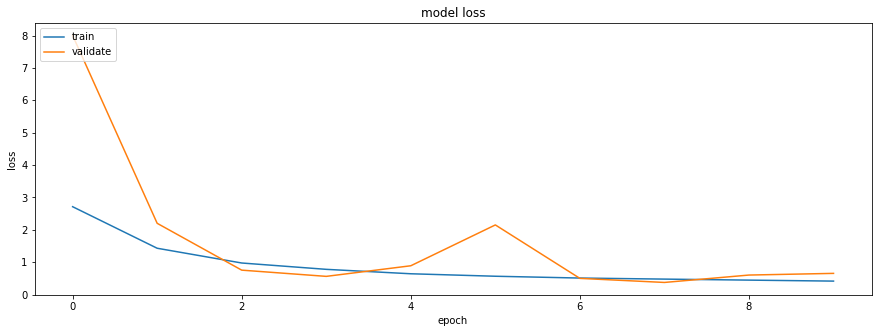

In [40]:
# summarize history for loss
plt.figure(figsize=(15,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()

## 17.4. Applying Image Augmentation to see if we get better model

In [138]:
history = model.fit_generator(datagen.flow(x_train, x_label, batch_size=32),
                        steps_per_epoch=x_train.shape[0] // 32,
                        epochs=20,
                        validation_data=(z_val, z_label))

Epoch 1/20
336/336 [==============================] - 23s 69ms/step - loss: 3.6200 - acc: 0.0636 - val_loss: 6.8965 - val_acc: 0.0357
Epoch 2/20
336/336 [==============================] - 21s 64ms/step - loss: 3.0152 - acc: 0.1114 - val_loss: 4.2872 - val_acc: 0.0644
Epoch 3/20
336/336 [==============================] - 25s 73ms/step - loss: 2.7069 - acc: 0.1597 - val_loss: 4.3495 - val_acc: 0.0751
Epoch 4/20
336/336 [==============================] - 31s 91ms/step - loss: 2.4899 - acc: 0.2144 - val_loss: 2.2959 - val_acc: 0.2746
Epoch 5/20
336/336 [==============================] - 29s 87ms/step - loss: 2.3429 - acc: 0.2531 - val_loss: 2.4348 - val_acc: 0.2154
Epoch 6/20
336/336 [==============================] - 34s 102ms/step - loss: 2.1963 - acc: 0.2993 - val_loss: 1.5724 - val_acc: 0.5476
Epoch 7/20
336/336 [==============================] - 41s 123ms/step - loss: 2.0758 - acc: 0.3321 - val_loss: 6.2829 - val_acc: 0.0722
Epoch 8/20
336/336 [==============================] - 34s 10

## Apparently image augmentation is not suitable for our data, so I will not use it 

## 17.5. Accuracy VS Epoch Visualization

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


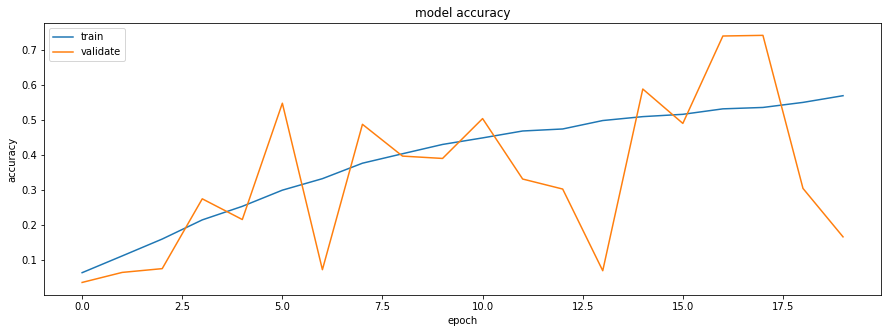

In [139]:
# summarize history for acuuracy
print(history.history.keys())
plt.figure(figsize=(15,5))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()

## 17.6. Loss VS Epoch Visualization

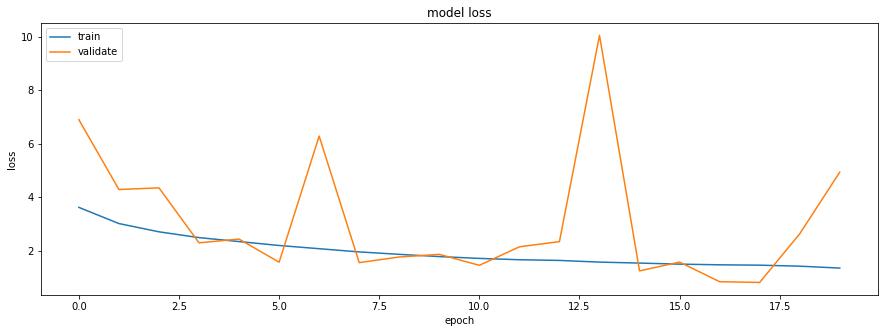

In [140]:
# summarize history for loss
plt.figure(figsize=(15,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()

## 17.7. Saving the best model to use it later 

In [41]:
model.save('my_model.hdf5')

# 18. Testing the model on the Test Dataset

In [42]:
evaluate = model.evaluate(y_test, y_label, verbose=1)

3360/3360 [==============================] - 1s 422us/sample - loss: 0.6966 - acc: 0.7420


## We got 74% accuracy from 10 epochs

# 19. We need to increase the number of epochs to get a better accuracy, and save the model that reduces the validation loss

In [43]:
epochs = 25
from keras.callbacks import ModelCheckpoint  
checkpointer = ModelCheckpoint(filepath='my_model.hdf5', verbose=1, save_best_only=True)

history = model.fit(x_train, x_label, 
                    validation_data=(z_val, z_label),
                    epochs=epochs, batch_size=32, verbose=1, callbacks=[checkpointer])
          
model.load_weights('my_model.hdf5')

Train on 10752 samples, validate on 2688 samples
Epoch 1/25
10720/10752 [============================>.] - ETA: 0s - loss: 0.3943 - acc: 0.8714
Epoch 00001: val_loss improved from inf to 0.33616, saving model to my_model.hdf5
10752/10752 [==============================] - 24s 2ms/sample - loss: 0.3940 - acc: 0.8714 - val_loss: 0.3362 - val_acc: 0.8917
Epoch 2/25
10720/10752 [============================>.] - ETA: 0s - loss: 0.3621 - acc: 0.8797
Epoch 00002: val_loss improved from 0.33616 to 0.31346, saving model to my_model.hdf5
10752/10752 [==============================] - 24s 2ms/sample - loss: 0.3616 - acc: 0.8798 - val_loss: 0.3135 - val_acc: 0.9003
Epoch 3/25
10720/10752 [============================>.] - ETA: 0s - loss: 0.3507 - acc: 0.8824
Epoch 00003: val_loss improved from 0.31346 to 0.16942, saving model to my_model.hdf5
10752/10752 [==============================] - 24s 2ms/sample - loss: 0.3503 - acc: 0.8826 - val_loss: 0.1694 - val_acc: 0.9461
Epoch 4/25
10720/10752 [====

### After increasing the epochs to 25 we got a higher accuracy, we can get even a  better accuracy by increasing the epochs more

In [44]:
metrics = model.evaluate(y_test, y_label, verbose=1)
print("Test Accuracy: {}".format(metrics[1]))
print("Test Loss: {}".format(metrics[0]))

3360/3360 [==============================] - 1s 420us/sample - loss: 0.1388 - acc: 0.9601
Test Accuracy: 0.9601190686225891
Test Loss: 0.1387500474672942


# 20. Evaluating the model
### printing classification report (Precision, recall, f1-score and support)

In [45]:
def get_predicted_classes(model, data, labels):
    image_predictions = model.predict(y_test)
    predicted_classes = np.argmax(image_predictions, axis=1)
    true_classes = np.argmax(y_label, axis=1)
    return predicted_classes, true_classes

def get_classification_report(y_true, y_pred):
    print(classification_report(y_true, y_pred))
        
y_pred, y_true = get_predicted_classes(model, y_test, y_label)
get_classification_report(y_true, y_pred)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       120
           1       0.98      1.00      0.99       120
           2       0.88      0.89      0.88       120
           3       0.91      0.92      0.91       120
           4       0.99      0.97      0.98       120
           5       0.96      0.99      0.98       120
           6       0.98      0.97      0.98       120
           7       0.94      0.99      0.96       120
           8       0.93      0.93      0.93       120
           9       0.94      0.98      0.96       120
          10       1.00      0.88      0.94       120
          11       0.94      1.00      0.97       120
          12       0.98      0.98      0.98       120
          13       0.97      0.96      0.97       120
          14       0.97      0.94      0.95       120
          15       0.94      0.98      0.96       120
          16       0.95      0.96      0.95       120
          17       0.99    

# 21. Conclusion
### As we see above, we got a pretty good accuracy and the model can get better over more epochs. Training CNN is a random process, each time you run the experiment you get a different results. It depends on multiple hyperparameters (number of layers, number of feature maps in each layer, dropouts, batch normalization, etc...). Therefore, you must run your experiments multiple times before you choose your final model.
